In [4]:
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ncd_post_process.graph_parsing import CollisionNode
from ncd_post_process.create_neuron_id.collisions_vs_dist_naive import *
%matplotlib notebook

In [3]:
plt.rcParams.update({"font.size": 22})
neuron_names = [
    "AP120410_s1c1",
    "AP120410_s3c1",
    "AP120412_s3c2",
    "AP120416_s3c1",
    "AP120419_s1c1",
    "AP120420_s1c1",
    "AP120420_s2c1",
    "AP120507_s3c1",
    "AP120510_s1c1",
    "AP120522_s3c1",
    "AP120524_s2c1",
    "AP120614_s1c2",
    "AP130312_s1c1",
    "AP131105_s1c1",
]
rest_of_neurons = neuron_names.copy()
l23_neurons_idx = [-1, -4, 7, 8, 6, -2]
l23_neurons = list(rest_of_neurons.pop(idx) for idx in l23_neurons_idx)

In [37]:
def show_ridge_plot(names, data):
    for name, datum in zip(names, data):
        coll_hist_axon, bins, _ = scipy.stats.binned_statistic(datum["dist"], datum["coll_normed"], 'sum', bins=len(datum))
        averaged = pd.DataFrame({'ax': coll_hist_axon})
        averaged["meaned"] = averaged.rolling(10).mean()
        sns.distplot(averaged["meaned"].fillna(0), kde=True, rug=True, color="g", kde_kws={"shade": True})
        sns.distplot(averaged["ax"].fillna(0), kde=True, rug=True, color="r", kde_kws={"shade": True})
        

In [6]:
names, data = [], []
for name in l23_neurons[2:]:
    graphname = name_to_graph_fname(name)
    coll_dist = CollisionsDistNaive.from_graph(graphname, name)
    coll_dist.run()
    data.append(coll_dist.parsed_axon)
    names.append(name)

<IPython.core.display.Javascript object>


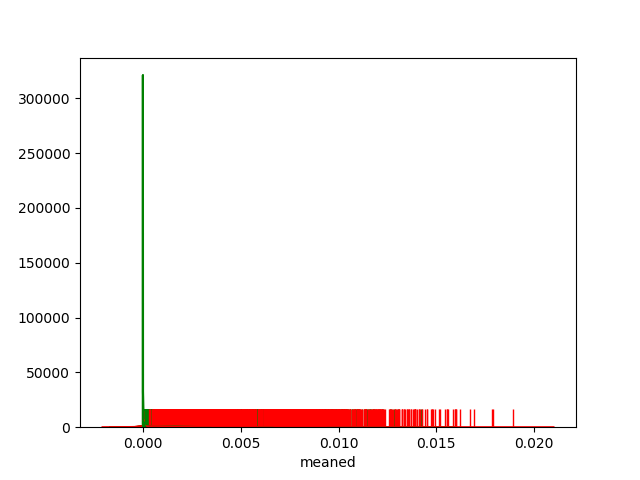

In [38]:
show_ridge_plot(names, data)

<IPython.core.display.Javascript object>


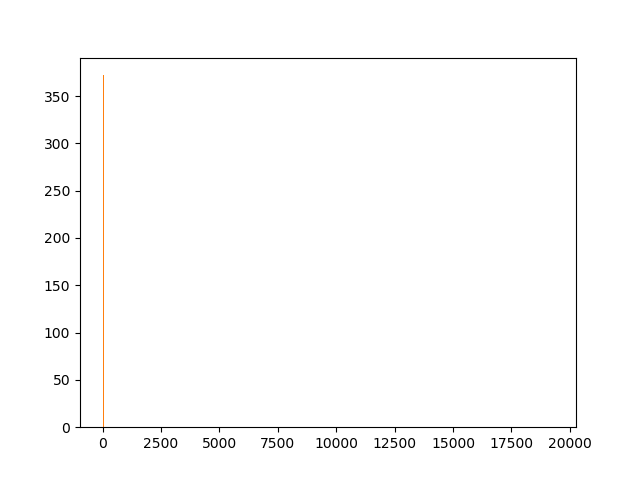

In [73]:
coll_hist_axon, bins, _ = scipy.stats.binned_statistic(data[2]["dist"], data[2]["coll_normed"], 'sum', bins=len(data[2])/30)
averaged = pd.DataFrame({'ax': coll_hist_axon})
averaged["meaned"] = averaged.rolling(3).mean()
# sns.lineplot(x=bins[:-1], y="meaned", data=averaged, color="g")
# sns.lineplot(x=bins[:-1], y="ax", data=averaged, color="r")
# sns.lineplot(x=bins[:-1], y=coll_hist_axon, color="k")
sns.distplot(coll_hist_axon, bins=bins, kde=False, hist_kws={'linewidth': 5})

<IPython.core.display.Javascript object>


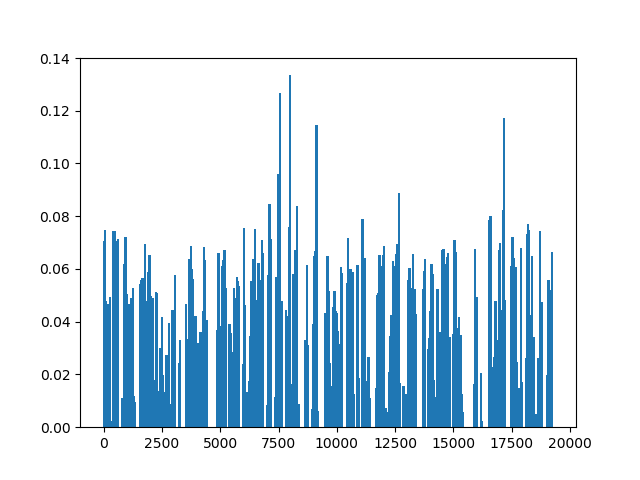

<BarContainer object of 372 artists>

In [83]:
plt.bar(bins[:-1], coll_hist_axon, width=100)